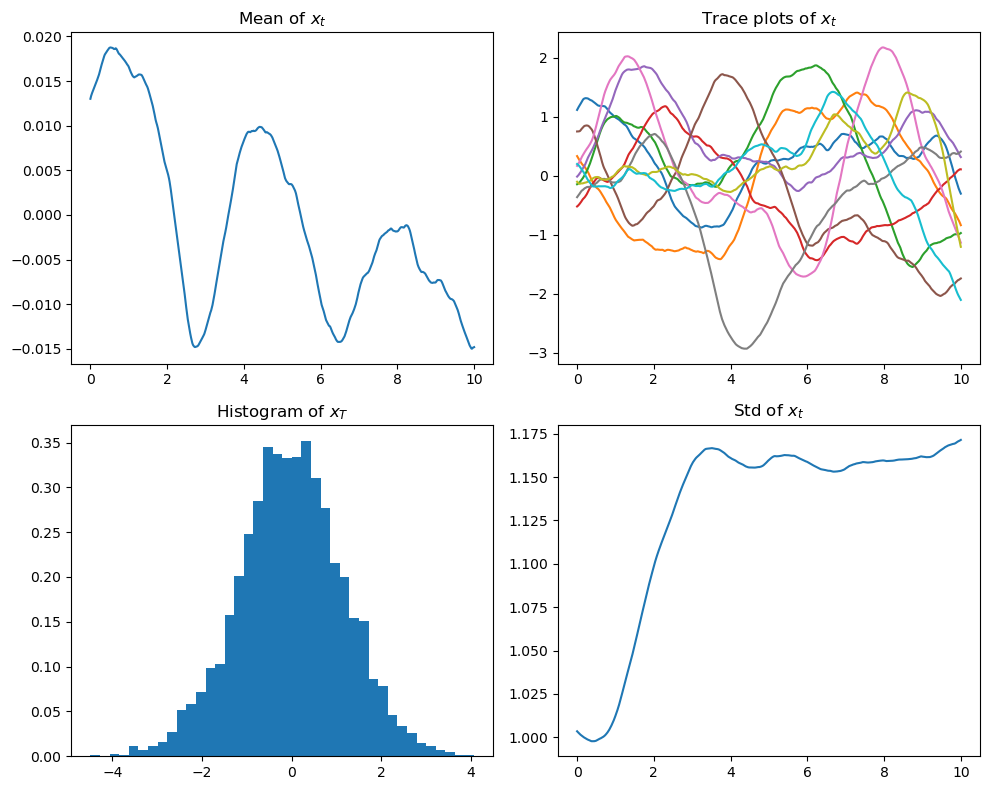

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Parameters
k = 1.0          # Stiffness of harmonic potential
gamma = 1.0
lam = 1.0
c = 0.5
beta = 1.0
T = 10.0         # Total simulation time
dt = 0.001
steps = int(T / dt)
N = 5000          # Number of particles

# Precomputed constants
sqrt_dt = np.sqrt(dt)
sigma_p = np.sqrt(2 * gamma / beta)
sigma_s = np.sqrt(2 * lam**2 * (1 - c**2) / beta)

@njit
def euler_maruyama_gld(N, steps, dt, k, gamma, lam, c, sigma_p, sigma_s):
    x = np.zeros((steps, N))
    p = np.zeros((steps, N))
    s = np.zeros((steps, N))
    
    # Initial condition
    x[0] = np.random.normal(0, 1, N)
    p[0] = np.random.normal(0, 1, N)
    s[0] = np.random.normal(0, 1, N)
    
    for t in range(steps - 1):
        dW_p = np.random.randn(N) * np.sqrt(dt)
        dW_s = np.random.randn(N) * np.sqrt(dt)

        x[t+1] = x[t] + p[t] * dt
        p[t+1] = p[t] + (-k * x[t] - gamma**2 * p[t] - gamma * lam * c * s[t]) * dt + sigma_p * dW_p
        s[t+1] = s[t] + (-gamma * lam * c * p[t] - lam**2 * s[t]) * dt + sigma_s * dW_s
    
    return x, p, s

# Run simulation
x, p, s = euler_maruyama_gld(N, steps, dt, k, gamma, lam, c, sigma_p, sigma_s)
time = np.linspace(0, T, steps)

# Diagnostics
mean_x = np.mean(x, axis=1)
std_x = np.std(x, axis=1)
final_x = x[-1]

# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].plot(time, mean_x)
axs[0, 0].set_title('Mean of $x_t$')

axs[0, 1].plot(time, x[:, :10])  # Plot 10 traces
axs[0, 1].set_title('Trace plots of $x_t$')

axs[1, 0].hist(final_x, bins=40, density=True)
axs[1, 0].set_title('Histogram of $x_T$')

axs[1, 1].plot(time, std_x)
axs[1, 1].set_title('Std of $x_t$')

plt.tight_layout()
plt.show()
